In [1]:
import pandas as pd
import numpy as np
import re
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/wooj/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


The data is organized in a binary-tree structure. Each phrase breaks off into two smaller phrases.

In [32]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')

train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


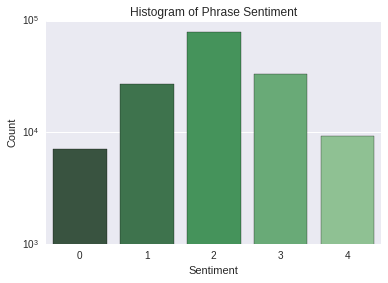

In [3]:
sns.countplot(x="Sentiment", data=train, palette="Greens_d")
plt.title("Histogram of Phrase Sentiment")
plt.ylabel("Count")
plt.yscale('log')

We printed out a few one-word phrases from each sentiment level:

In [4]:
# Extracts one-word phrases from the data
regexp = re.compile(' ')
words = train[~train.Phrase.str.contains(' ')]
words = words[words.Phrase.str.contains('^[a-zA-Z]+$')]
words.Phrase = words.Phrase.str.lower()

# Organizes words by sentiment
classes = [words[words.Sentiment == 0],
           words[words.Sentiment == 1],
           words[words.Sentiment == 2],
           words[words.Sentiment == 3],
           words[words.Sentiment == 4]]

# Prints a few words from each sentiment class
print "0:"
print classes[0].Phrase.unique()[0:5]
print ""
print "1:"
print classes[1].Phrase.unique()[0:5]
print ""
print "2:"
print classes[2].Phrase.unique()[0:5]
print ""
print "3:"
print classes[3].Phrase.unique()[0:5]
print ""
print "4:"
print classes[4].Phrase.unique()[0:5]

0:
['hate' 'avoid' 'bad' 'impossible' 'fails']

1:
['deceit' 'murder' 'tragedy' 'trouble' 'plodding']

2:
['a' 'series' 'of' 'escapades' 'demonstrating']

3:
['good' 'amuses' 'fans' 'positively' 'intrigue']

4:
['entertaining' 'thrilling' 'joy' 'extravagant' 'better']


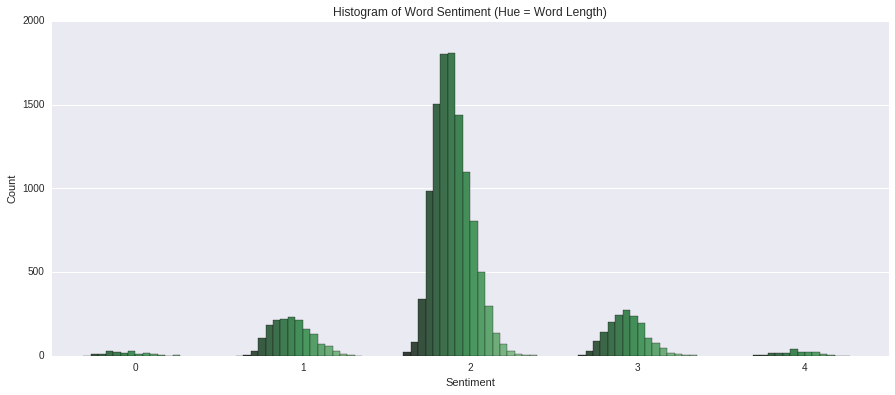

In [5]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x="Sentiment", data=words, hue=words.Phrase.str.len(), palette="Greens_d")
ax.legend().set_visible(False)
plt.title("Histogram of Word Sentiment (Hue = Word Length)")
plt.ylabel("Count")

/home/wooj/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


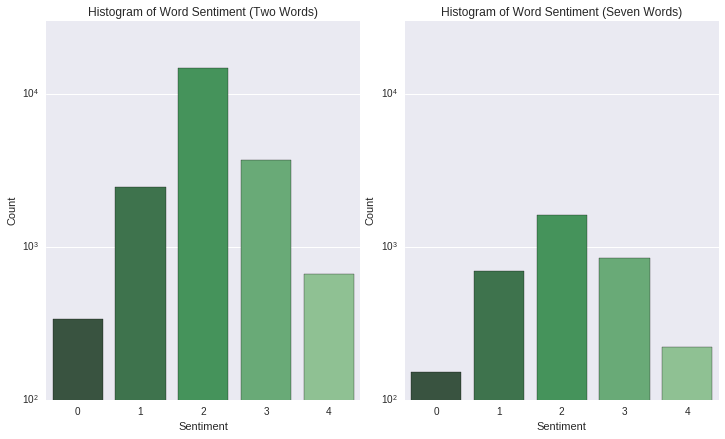

In [6]:
two_words = train[train.Phrase.str.contains('^[A-Za-z]* [A-Za-z]*$')]
two_words.Phrase = train.Phrase.str.lower()

seven_words = train[train.Phrase.str.contains('^[A-Za-z]* [A-Za-z]* [A-Za-z]* [A-Za-z]* [A-Za-z]* [A-Za-z]* [A-Za-z]*$')]
seven_words.Phrase = train.Phrase.str.lower()

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.countplot(x="Sentiment", data=two_words, palette="Greens_d")
plt.title("Histogram of Word Sentiment (Two Words)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim([1e2, 3e4])

plt.subplot(1,2,2)
sns.countplot(x="Sentiment", data=seven_words, palette="Greens_d")
plt.title("Histogram of Word Sentiment (Seven Words)")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim([1e2, 3e4])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [54]:
# Only extracts the sentences from the dataset
sentences_dict = train['SentenceId'].drop_duplicates()
sentences = train.iloc[sentences_dict.keys()]
sentences.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1


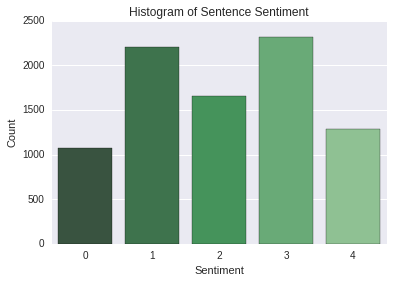

In [8]:
sns.countplot(x="Sentiment", data=sentences, palette="Greens_d")
plt.title("Histogram of Sentence Sentiment")
plt.ylabel("Count")

In [55]:
non_sentences_idx = [x for x in range(len(train)) if x not in sentences_dict]
non_sentences = train.iloc[non_sentences_idx]
non_sentences[0:10]

,PhraseId,SentenceId,Phrase,Sentiment
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2
10,11,1,demonstrating the adage,2


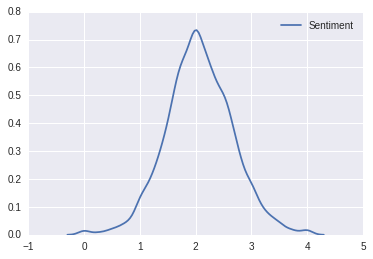

In [58]:
avg_sentiment = non_sentences.groupby(['SentenceId']).mean().Sentiment
sns.kdeplot(avg_sentiment)

# len(sentences.Sentiment) - len(avg_sentiment)

We also looked at negations and how they might affect the model that we will implement later. We looked at one phrase in particular: "its not very informative." Although "very informative" has a very positive sentiment (4), "not very informative" causes the sentiment to drop to being neutral (2).

In [ ]:
sentences[sentences.Phrase.str.contains('no |not ')][0:10]

In [ ]:
print train[train.Phrase == "a particularly good film"].Sentiment
print train[train.Phrase == "It 's not a particularly good film"].Sentiment

We broke down each sentence into a list of tokens and averaged the sentiment of the words.

In [ ]:
words[words.Phrase.str.contains("^interest$")].Sentiment